# Tarea 1 - EYP3407
### Profesor: Mauricio Castro
### Por: Javiera Valenzuela Soto y Francisca Vilca Sánchez

In [ ]:
# Librerías a usar

#%pip install scipy

import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Entropía
Sea $Z$ una variable aleatoria con función de densidad dada por

$$f(z |\mu ,\sigma^2,\alpha) = \frac{2}{\sigma}\phi(\frac{z − \mu}{\sigma})\Phi(\alpha(\frac{z − \mu}{\sigma})),z \in \mathbb{R},$$

donde $\phi(·)$ y $\Phi(·)$ representan la función de densidad y la función distribución, respectivamente, de una variable aleatoria normal estándar. La notación utilizada para referirnos a la distribución de $Z$ seŕa $Z ∼ SN(\mu,\sigma^2,\alpha)$. Note que cuando $\alpha = 0, Z ∼ N(\mu,\sigma^2)$. Muestre
que la entropía $H_{SN}(\mu,\sigma^2,\alpha)$ de $Z$, está dada por 

$$H_{SN}(\mu,\sigma^2,\alpha) = H_{N}(\mu,\sigma^2) − E_{X_0} [ln (2\Phi(\alpha X_0))] ,$$

donde $X_0 ∼ SN(\alpha)$ y $H_{N(\mu,\sigma^2)}$ es la entropía cuando $Z ∼ N(\mu,\sigma^2)$. Grafique la entropía $H_{SN}(\mu=0,\sigma^2=1,\alpha)$ para diferentes una grilla de valores de α entre $−20$ y $20$. ¿Qué puede concluir de lo anterior?

## Solución:

Para comprobar que la Entropía de una Skew-normal (SN) se puede reescribir en términos de la Entropía de una Normal más la Esperanza de una variable aleatoria SN con $\mu = 0 $ y $ \sigma^2 = 1$, para ello nos guiaremos del árticulo "*Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions*". Usando el Lema 1, de dicho árticulo es posible comprobar que la Entropía de una va $Z ~ N(\mu,\sigma^2) $ se puede reescribir como:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= -E(log ( \frac{1}{\sqrt{2\pi\sigma^2}} exp\{ \frac{1}{2}(\frac{x-\mu}{\sigma^2})^2 \} ) ) \\
&= -E(log(\sigma^{-1})) - E( (log(f(Z_0))) ) \\
&= log(\sigma) - H(Z_0)
\end{align*}

Donde $Z_0 \sim N(0,1)$, con este Lema y usando la definición de Entropía se puede obtener:

\begin{align*}
H(Z) &= -E(log(f(Z))) \\
&= log(\sigma) - H(X_0) \\
&= log(\sigma) - E(log(2\phi(X_0)\Phi(\alpha X_0)))\\
&= log(\sigma) - E(log(\phi(X_0))) - E(log(2\Phi(\alpha X_0)))\\
&= H(Z) - E( log(2 \Phi (\alpha X_0)) )
\end{align*}

Con el procedimiento anterior se muestra el resultado pedido, ahora para revisar que ocurre con la Entropía de una Skew-Normal se usará la librería `spicy.stats` para calcular la Entropía de las diferentes distribuciones tal como se muestra a continuación en el siguiente código:

In [ ]:
# Definimos los parámetros de la distribución skew-normal como mu = 0 y sigma2 = 1
# Pero para alpha sera un vector con distintos valores

alpha = np.linspace(-20,20,1000) # Parámetro de sesgo
media = 0  # Media
sigma2 = 1  # Desviación estándar

entropy_SKN = list()
entropy_N = list()

# Crearemos 100 distribuciones skew-normal
for i in range(len(alpha)):
    skew_normal_dist = stats.skewnorm(alpha[i],loc= media,scale= sigma2)
    normal_dist = stats.norm(0, 1)
    entropy_N.append(normal_dist.entropy())
    entropy_SKN.append(skew_normal_dist.entropy())


In [ ]:
data = {"alphas": alpha,"entropia_SKN": entropy_SKN,"entropia_N": entropy_N}

df = pd.DataFrame(data)
df.head()

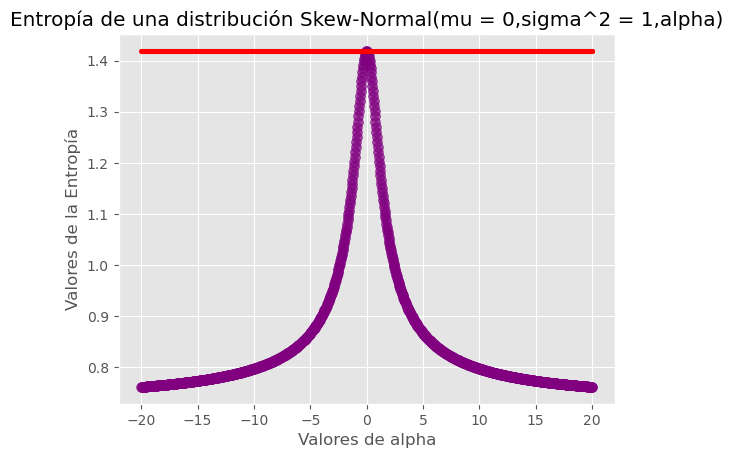

In [ ]:
plt.style.use("ggplot")
df.plot(x = "alphas", y = "entropia_SKN", kind="scatter",color="purple",s=50, alpha = 0.7)
plt.xlabel("Valores de alpha")
plt.ylabel("Valores de la Entropía")
plt.title("Entropía de una distribución Skew-Normal(mu = 0,sigma^2 = 1,alpha)")
plt.scatter(alpha,entropy_N, label='Nuevos', color='red',s=10, alpha = 0.9)


El parámetro de sesgo $\alpha$ de una distribución Skew-Normal controla la asimetría de la distribución. Al cambiar el valor de $\alpha$ tendrá un efecto en la forma de la distribución Skew-Normal, y por consiguinte, afectará la entropía de la distribución.

En este caso, lo que se hizó fue generar 1000 puntos en el intervalo -20 y 20, es bastante claro notar que a medida que se acerca a 0 tanto por la derecha o la izquierda la entropía se asemeja a la entropía de una Normal Estándar.

Ahora bien, el tener un valor $|\alpha|> 5$ aproximadamente, es bastante útil, ya que la entropía es bastante baja por lo que hay mayor información de los eventos, disminuyendo de la misma manera la incertidumbre.

## 2) Sistemas de Recomendación a usar

### (a) Descripción y objetivo del problema

La dataset utilizada contiene la información sobre las preferencias y calificaciones de 73516 usuarios en 12294 animes categorizados según su género y tipo de anime...(bla bla bla). El objetivo de este trabajo consiste en realizar un sistema de recomendación del próximo anime para ver de posible interés en base a las calificaciones entregadas por cada usuario.

#### Análisis Exploratorio de los datos

##### Limpieza de los datos

Para comenzar, se realizó una limpieza inicial en los datos, para realizar el sistema de recomendación. Inicialmente

In [1]:
data = pd.read_csv("anime.csv")
display(data.head())
print("Dimensiones:", data.shape)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Dimensiones: (12294, 7)


Procedemos a separar la columna de género por comas, para así tener la caracterización completa de cada anime. 

In [129]:
genre= data["genre"].str.split(',', expand=True)
data = pd.concat([data, genre], axis=1)
data.columns
data.rename(columns={0:'genero_1', 1:'genero_2', 2:'genero_3', 3:'genero_4', 
4:'genero_5', 5:'genero_6',6:'genero_7',7:'genero_8',8:'genero_9',9:'genero_10',
10:'genero_11',11:'genero_12',12:'genero_13'}, inplace=True)
data.drop(['genre'], axis=1, inplace=True)
data

,anime_id,name,type,episodes,rating,members,genero_1,genero_2,genero_3,genero_4,genero_5,genero_6,genero_7,genero_8,genero_9,genero_10,genero_11,genero_12,genero_13
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,28977,Gintama°,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,Steins;Gate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12290,5543,Under World,OVA,1,4.28,183,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12291,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [124]:
data.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

,type
type,
Movie,2348
Music,488
ONA,659
OVA,3311
Special,1676
TV,3787


<Axes: xlabel='type'>

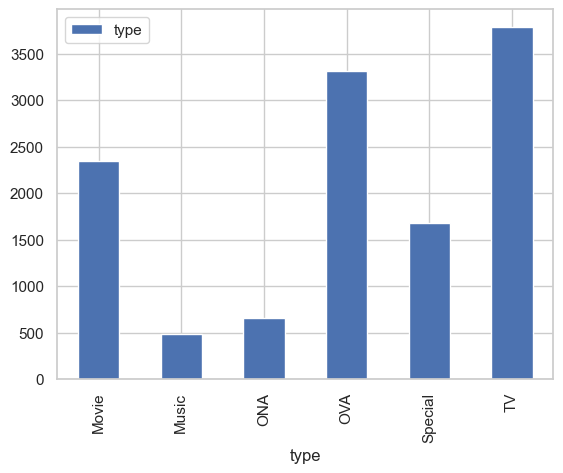

In [125]:
data_barplot = data.groupby(["type"]).agg({"type": "count"})
display(data_barplot)
data_barplot.plot(kind="bar")

Para la recomendación, nos centraremos en los tipos de anime que pertenezcan a la clasificación de "TV", "Especial" y "OVA", ya que son los elementos más similares entre sí y que pueden tener una continuación en la trama presentada por el anime. En cambio, las películas poseen una mayor duración y (bla bla bla)

In [113]:
data.query('type == "TV" or type == "OVA" or type== "Special"', inplace=True)


Se procedió a eliminar los valores faltantes de la columna rating ya que necesitamos esos datos para poder realizar la recomendación. Además, la cantidad total resultante no varió demasiado, si es que lo comparamos con la primera cantidad (poner bla bla más bonito)

In [114]:
# Eliminamos los valores nulos de la columna rating
data.dropna(subset=['rating'], inplace= True)
# Se procede a realizar un histograma para asi ver como realizaremos la ponderación
# de los ratings para el sistema de recomendación

In [115]:
data.episodes.unique()
data['episodes'].replace("Unknown", "emision", inplace=True)
data.episodes.unique()


array(['64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '1',
       '99', 'emision', '39', '101', '47', '50', '62', '33', '112', '23',
       '3', '94', '6', '8', '14', '7', '40', '15', '203', '77', '291',
       '120', '102', '96', '38', '79', '175', '103', '70', '153', '45',
       '5', '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '9', '49', '366', '97', '78', '358',
       '155', '20', '104', '113', '48', '54', '167', '161', '42', '142',
       '31', '373', '220', '46', '195', '17', '1787', '73', '147', '127',
       '16', '19', '98', '150', '76', '53', '124', '29', '115', '224',
       '44', '58', '93', '154', '92', '67', '172', '86', '30', '276',
       '59', '72', '330', '41', '105', '128', '137', '56', '55', '65',
       '243', '193', '18', '191', '180', '91', '192', '66', '182', '32',
       '164', '100', '296', '694', '95', '68', '117', '151', '130',

Text(0.5, 1.0, 'Histograma de Rating - Anime')

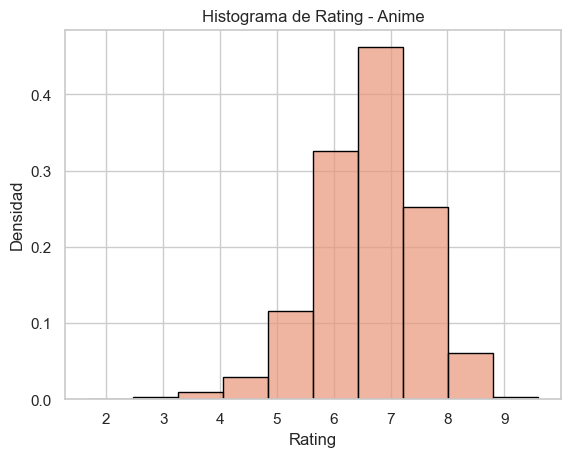

In [116]:
sns.set(style="whitegrid")  # Establece un estilo de fondo
sns.histplot(data=data, x="rating", bins=10, color='#E9967A', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Anime')


Vamos a contar los valores que son menores de 3, para ver la cantidad existente y decidir si eliminarlos o no


In [117]:
# Definir condiciones
condicion1 = (data["rating"] <3)
condicion2 = (data["rating"] >= 3)
titulo= ">=3"
titulo2= "<3"
tabla = {
    f'Animes con rating {titulo2}': sum(condicion1),
    f'Animes con rating {titulo}': sum(condicion2)
}

# Procedemos a agrupar según esas variables
tablita = pd.DataFrame(list(tabla.items()), columns=['', 'Recuento'])
print(tablita)


                          Recuento
0   Animes con rating <3        13
1  Animes con rating >=3      8614


Text(0.5, 1.0, 'Histograma de Rating - Anime')

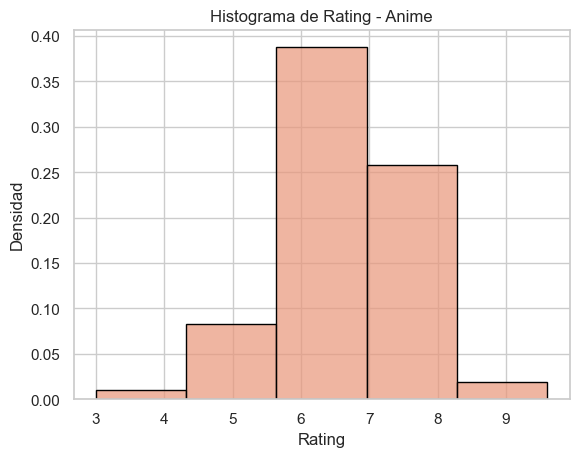

In [120]:
data.query('rating >= 3', inplace=True)
# Volvemos a graficar
sns.set(style="whitegrid")  # Establece un estilo de fondo
sns.histplot(data=data, x="rating", bins=5, color='#E9967A', edgecolor='black', alpha=0.7, stat="density")
# Personalizar el aspecto del histograma
plt.xlabel('Rating')
plt.ylabel('Densidad')
plt.title('Histograma de Rating - Anime')


#### (c) Descripción del método utilizado

#### (d) Implementación computacional

#### (e) Resultados obtenidos

#### (f) Medida de performance

### Preguntas a Contestar:

#### (a) ¿Cuál es en su opinión el mejor sistema de recomendación? Discutir
#### (b) ¿Los métodos considerados son escalables? Comente

## Bibliografía

[1] Arellano-Valle, R. B., Contreras-Reyes, J. E., & Genton, M. G. (2012). Shannon Entropy and mutual information for multivariate Skew-Elliptical distributions. *Scandinavian Journal of Statistics*, 40(1), 42-62. https://doi.org/10.1111/j.1467-9469.2011.00774.x